# Todo 

1. Add df.describe() functionality
2. Transpose
3. CSV Slicing
4. Where
5. Print the values like in Pandas
6. Exponents
7. Pivot tables
8. Odo R data
9. Join docstring is not useful

In [2]:
import sys
sys.path.append('/Users/Will/Devel/git/blaze/')
sys.path.reverse()
import blaze
print(blaze.__file__)

/Users/Will/Devel/git/blaze/blaze/__init__.pyc


In [3]:
import warnings
warnings.filterwarnings("ignore")

# 10 Minutes to Blaze 

This section provides a short introduction for Blaze. After reading this section, beginners should know how to do basic data operations with blaze [rephrase].

In [4]:
import blaze as bz
from blaze import odo

# Data Input and Output

Data used in this section can be found [here](https://github.com/Will-So/blaze_data). The interface for reading different data types is consistent. With all data stores, we use the `Data` object to load the data. 

## Reading from a CSV

In [5]:
from blaze import Data

In [7]:
iris = Data(DATA_DIR + 'iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Reading from an SQL Database

In [9]:
db = Data('sqlite:////' + DATA_DIR + 'lahman2013.sqlite')

We can use the `fields` attribute to look at a list of the tables in the database. Note that with Ipython you can also type `db.<TAB>` to see all the tables. Alternatively, simply print `db.fields` to view all the tables.

In [10]:
print(db.fields,)

([u'AllstarFull', u'Appearances', u'AwardsManagers', u'AwardsPlayers', u'AwardsShareManagers', u'AwardsSharePlayers', u'Batting', u'BattingPost', u'Fielding', u'FieldingOF', u'FieldingPost', u'HallOfFame', u'Managers', u'ManagersHalf', u'Master', u'Pitching', u'PitchingPost', u'Salaries', u'Schools', u'SchoolsPlayers', u'SeriesPost', u'Teams', u'TeamsFranchises', u'TeamsHalf', u'temp'],)


In [11]:
df = db.Batting
df.head(3)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,aardsda01,2006,1,CHN,NL,45,43,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,45
2,aardsda01,2007,1,CHA,AL,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


## Reading from HDF5

First, we take a look at the `File Object` of the HDF5 files. 

In [16]:
Data(DATA_DIR + 'sample.hdf5').fields

['info', 'points', 'z']

So now we see that there are three different datasets in the file. We pick the one we are interested in:

In [14]:
hdfs_df = Data(DATA_DIR + 'sample.hdf5::/z')
hdfs_df[:2]

,z
0,0.628902
1,0.797281


Dealing with HDF5 files is somewhat more complex than most types of files. More details for dealing with HDF5 files can be found [here](https://odo.readthedocs.org/en/latest/hdf5.html). 

## Reading Other Files 

Most other supported backends can be loaded in the same way that we load HDF5 and SQL. A notable exception is Spark. If you need to use Spark with Blaze, the documentation [here](http://odo.readthedocs.org/en/latest/spark.html) provides an excellent walkthrough.

As of version 0.8, supported backends include AWS, CSV, JSON, HDF5, Hadoop File System, Hive, Mongo, Spark/SQL, SAS, SQL, and SSH. 

## Writing files

The Blaze ecosystem also makes it to save data into new formats. 

In [15]:
odo(df, DATA_DIR + 'baseball.csv')

# Viewing Data 

See the top and bottom rows of our dataset. 

In [10]:
df.head(5)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,aardsda01,2006,1,CHN,NL,45,43,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,45
2,aardsda01,2007,1,CHA,AL,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,aardsda01,2008,1,BOS,AL,47,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
4,aardsda01,2009,1,SEA,AL,73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


Blaze also offers a number of ways to interactively look at our datasets.

We can select a single column using either df[`column_name`] or df.`column_name`. The former allows us to select multiple columns at once.

In [20]:
df[['teamID', 'G', 'H']][:3]

,teamID,G,H
0,SFN,11,0
1,CHN,45,0
2,CHA,25,0


Selecting via `[]` can also be useful

In [25]:
df[1000:1002]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,allench01,2000,1,MIN,AL,15,15,50,2,15,3,0,0,7,0,2,3,14,0,1,0,1,1,15
1,allench01,2001,1,MIN,AL,57,57,175,20,46,13,2,4,20,1,2,19,37,1,0,0,1,7,57


For most backends other than SQL, we can also select data via location using the following syntax: `df[[1,3, 6]]`. This collects the 2nd, 4th, and 7th elements of the dataest. 

In [34]:
hdfs_df[[1,3,6]]

,z
0,0.797281
1,0.047750
2,0.772755


## Filtering Data 

We can use `isin` for basic conditional logic. Here we select a row only if years are in 2008 and 2010.

In [23]:
df[df.yearID.isin([2008, 2010])][:5]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2008,1,BOS,AL,47,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5
1,aardsda01,2010,1,SEA,AL,53,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,abadfe01,2010,1,HOU,NL,22,22,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
3,abercre01,2008,1,HOU,NL,34,34,55,10,17,5,0,2,5,5,2,1,23,0,2,1,1,0,34
4,abreubo01,2008,1,NYA,AL,156,156,609,100,180,39,4,20,100,22,11,73,109,2,1,0,1,14,156


We can also select rows based on the values of a single columns. Here we select the rows where players have gotten more than 255 hits a year.

In [39]:
df[df.H > 255]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,sislege01,1920,1,SLA,AL,154,154,631,137,257,49,18,19,122,42,17,46,19,NaN,2,13,NaN,NaN,154
1,suzukic01,2004,1,SEA,AL,161,161,704,101,262,24,5,8,60,36,11,49,63,19,4,2,3,6,161


# Dealing with Missing Data 

Pending `isnull` implementation.

# Operations

## Descriptive statistics

In [41]:
df.count()

97889

In [66]:
df.HR.value_counts()

AttributeError: 'Field' object has no attribute 'value_counts'

In [57]:
df.H.max(), df.AB.max(), df.HR.max()

(262, 716, 73)

In [62]:
df.H.mean()

40.366883116883116

We can also combine these operations with the filtering operations previously discussed.

In [63]:
df[df.AB > 100].H.mean()

92.42354023984191

## Basic Arithmetic

Basic arithemtic (`+`, `-`, `*`, `/`) is also possible.

In [65]:
df1 = df.H * 2
df1[400:405]

,H
0,150
1,92
2,34
3,6
4,122


## Basic Descriptive Stats

In [93]:
df.H.count()

91476

In [84]:
df.H.max()

262

In [51]:
df[df.AB > 100].H.mean()

92.42354023984191

# Applying Functions

## Plotting

The quickest way to make basic plots with datasets that can fit in memory is to convert your dataset to a Pandas Dataframe. See the Pandas [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html) documentaiton for details. 

In [68]:
import pandas as pd
from odo import odo
pandas_df = odo(df, pd.DataFrame)

In [75]:
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


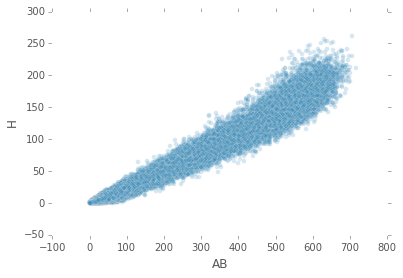

In [84]:
_ = pandas_df.plot(kind='scatter', x='AB', y='H', alpha=.2) 

# Operations 

# Merging

In [24]:
from blaze import join
all_stars = db.AllstarFull

In [30]:
all_stars.head(2)

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,aaronha01,1955,0,NLS195507120,ML1,NL,1,NaN
1,aaronha01,1956,0,ALS195607100,ML1,NL,1,NaN


In [34]:
?join

In [33]:
all_star_stats = join(df, all_stars, ['playerID','yearID'])
all_star_stats.head(4)

,playerID,yearID,stint,teamID_left,lgID_left,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,gameNum,gameID,teamID_right,lgID_right,GP,startingPos
0,aaronha01,1955,1,ML1,NL,153,153,602,105,189,37,9,27,106,3,1,49,61,5,3,7,4,20,153,0,NLS195507120,ML1,NL,1,NaN
1,aaronha01,1956,1,ML1,NL,153,153,609,106,200,34,14,26,92,2,4,37,54,6,2,5,7,21,153,0,ALS195607100,ML1,NL,1,NaN
2,aaronha01,1957,1,ML1,NL,151,151,615,118,198,27,6,44,132,1,1,57,58,15,0,0,3,13,151,0,NLS195707090,ML1,NL,1,9
3,aaronha01,1958,1,ML1,NL,153,153,601,109,196,34,4,30,95,4,1,59,49,16,1,0,3,21,153,0,ALS195807080,ML1,NL,1,9


# Grouping 

# Converting Data 

# Gotchas

- Transferring SQL files to a new format can take a long time. 

#  Tips

- It is not currently possible to change a dataset when using a `Data` object. When changing data is necessary, use `odo` to transform the data into a database or array technology of your choice (Pandas DataFrame, HDFS). See the `odo` [documentation](https://odo.readthedocs.org/en/latest/) for more information.
- Categories. 

# No Read

In [1]:
DATA_DIR = '/Users/Will/Data/blaze_data/'